# Polynomial Regression
---
### Now let's apply simple linear regression to **Portugal**  data and see the result. 

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [20]:
df=pd.read_csv("./dataset/covid_vaccination_vs_death_ratio.csv")

Coefficients:  [[-1.14221336]]
Intercept:  [78.7351537]


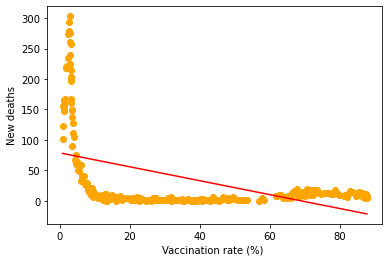

Mean absolute error: 44.99
Residual sum of squares (MSE): 3593.70
R2-score: 0.24


In [24]:
mydf = df[df.country == "Portugal"]

regr = linear_model.LinearRegression()
train_x = np.asanyarray(mydf[['ratio']])
train_y = np.asanyarray(mydf[['New_deaths']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


plt.scatter(mydf.ratio, mydf.New_deaths,  color='orange')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], color='red')
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()

test_x = np.asanyarray(mydf[['ratio']])
test_y = np.asanyarray(mydf[['New_deaths']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )